# Colates, cleans and analyses canopy temperature data from Rain shelter barley trail

In [1]:
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ETFunctions as et
%matplotlib inline

HourSec = 3600

In [2]:
Data = pd.read_pickle('.\DataFrames\TempAndMet.pkl')

In [3]:
Start = Data.index.min()
End = Data.index.max()

## Calculate Potential Evapotranspiration

### Produce hourly metDataFrame


In [4]:
HourlyMetData = pd.DataFrame(index = Data.loc[Start:End,:].resample('h').mean().index)
HourlyMetData.loc[:,'AirTemperature'] = Data.loc[Start:End,'AirTemperature'].resample('h').mean()
HourlyMetData.loc[:,'IncomingRadnMJ'] = Data.loc[Start:End,'IncomingRadnMJ'].resample('h').sum()
HourlyMetData.loc[:,'Rainfall'] = Data.loc[Start:End,'Rainfall'].resample('h').sum()
HourlyMetData.loc[:,'RelativeHumidity'] = Data.loc[Start:End,'RelativeHumidity'].resample('h').mean()
HourlyMetData.loc[:,'Windspeed'] = Data.loc[Start:End,'Windspeed'].resample('h').mean()
HourlyMetData.loc[:,'NetRadiation'] = Data.loc[Start:End,'RnMJ'].resample('h').sum()
HourlyMetData.loc[:,'Ra'] = Data.loc[Start:End,'Ra'].resample('h').mean()

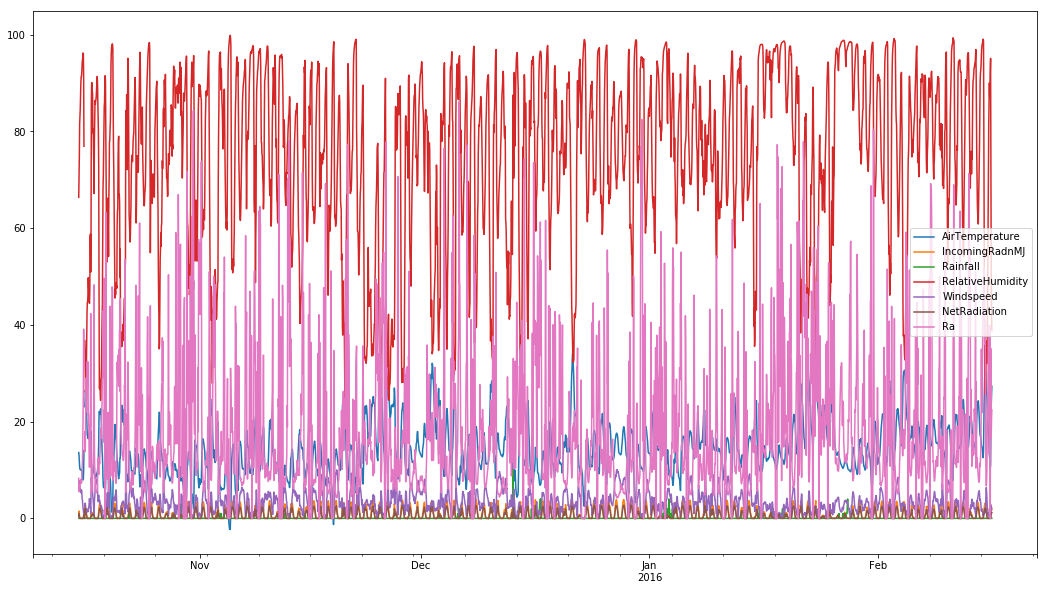

In [5]:
HourlyMetData.plot(figsize=(18,10))

In [6]:
HourlyMetData.sort_index(axis=0, inplace=True)
HourlyMetData.sort_index(axis=1, inplace=True)

In [7]:
HourlyMetData.loc[:,'NightTimePET'] =[et.PenmanMonteith(HourlyMetData.loc[x,'NetRadiation'],
                              HourlyMetData.loc[x,'AirTemperature'],
                              HourlyMetData.loc[x,'RelativeHumidity'],
                              HourlyMetData.loc[x,'Windspeed'],
                              HourlyMetData.loc[x, 'Ra'],
                              200,HourSec) for x in HourlyMetData.index]

C:\Anaconda\lib\ETFunctions.py:424: RuntimeWarning: divide by zero encountered in double_scalars
  Numerator = D*Rn + duration * Pa * Cp * (VPD/ra)
C:\Anaconda\lib\ETFunctions.py:425: RuntimeWarning: divide by zero encountered in double_scalars
  Denominator = D + G*(1+(rs/ra))
C:\Anaconda\lib\ETFunctions.py:426: RuntimeWarning: invalid value encountered in double_scalars
  _ret = Numerator/Denominator


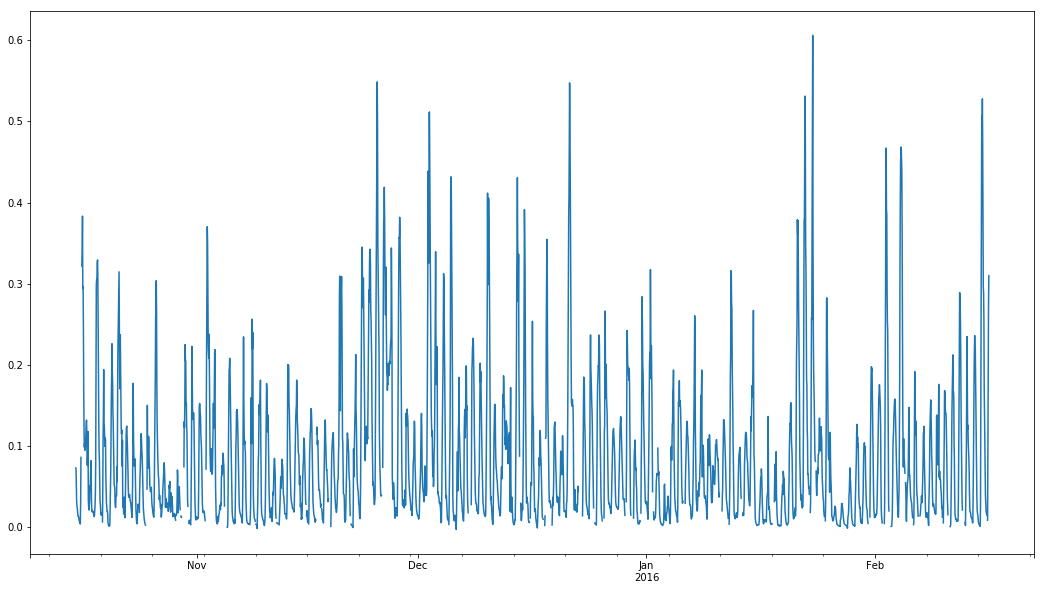

In [8]:
HourlyMetData.loc[:,'NightTimePET'].plot(figsize=(18,10))

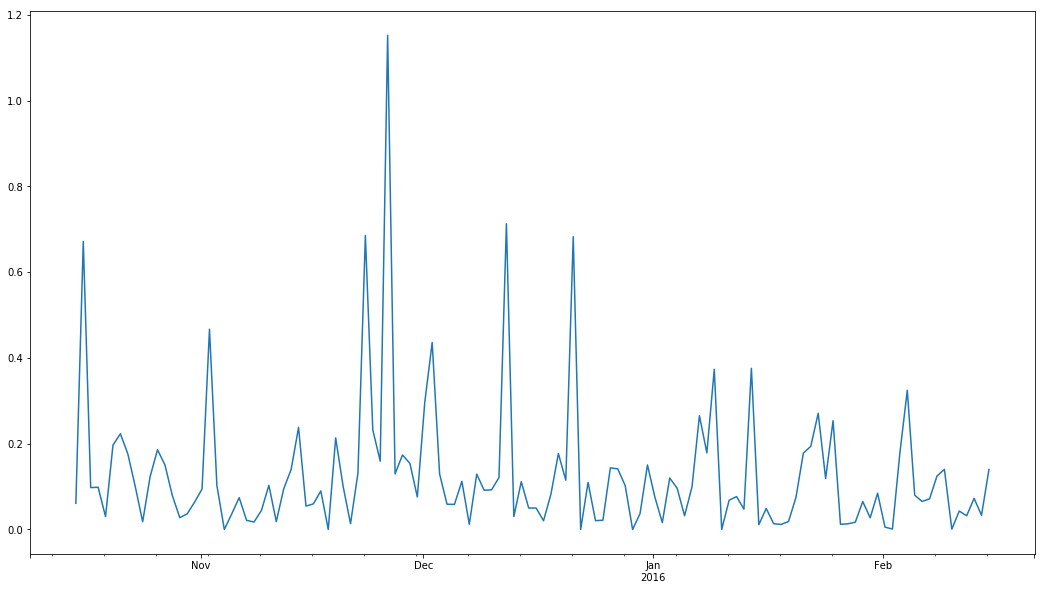

In [9]:
NightTimePET = HourlyMetData.iloc[HourlyMetData.index.indexer_between_time(datetime.time(23),
                    datetime.time(4)),:]['NightTimePET'].resample('24h',base=5).sum()
NightTimePET.plot(figsize=(18,10))

In [10]:
NightTimePET.to_pickle('./DataFrames/NightTimePET.pkl')

In [11]:
HourlyMetData.loc[:,'DayLightPET'] =[et.PenmanMonteith(HourlyMetData.loc[x,'NetRadiation'],
                              HourlyMetData.loc[x,'AirTemperature'],
                              HourlyMetData.loc[x,'RelativeHumidity'],
                              HourlyMetData.loc[x,'Windspeed'],
                              HourlyMetData.loc[x, 'Ra'],
                              70,HourSec) for x in HourlyMetData.index]

C:\Anaconda\lib\ETFunctions.py:424: RuntimeWarning: divide by zero encountered in double_scalars
  Numerator = D*Rn + duration * Pa * Cp * (VPD/ra)
C:\Anaconda\lib\ETFunctions.py:425: RuntimeWarning: divide by zero encountered in double_scalars
  Denominator = D + G*(1+(rs/ra))
C:\Anaconda\lib\ETFunctions.py:426: RuntimeWarning: invalid value encountered in double_scalars
  _ret = Numerator/Denominator


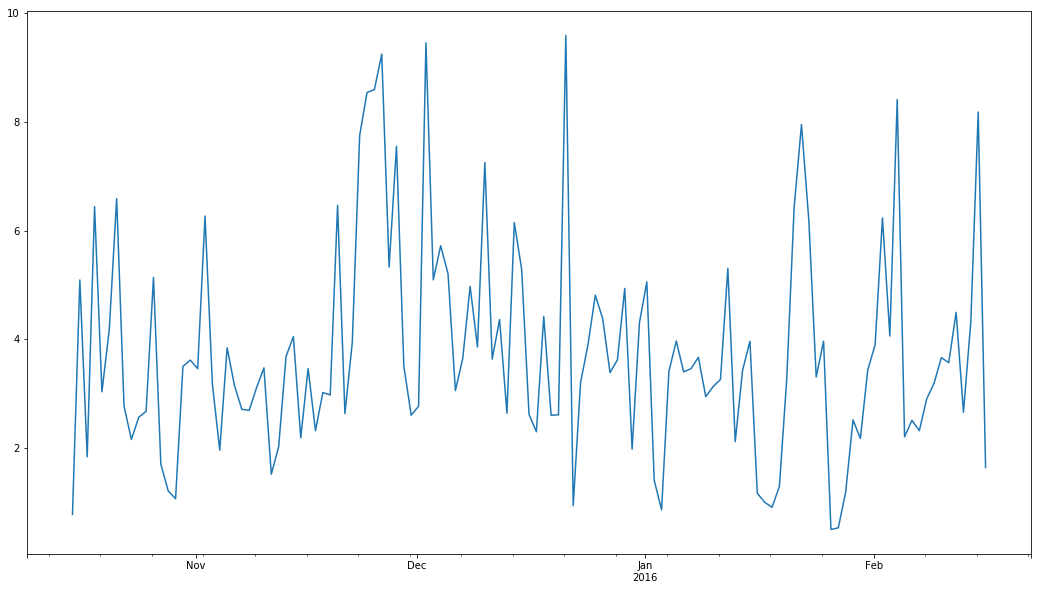

In [12]:
DayTimePET = HourlyMetData.iloc[HourlyMetData.index.indexer_between_time(datetime.time(5),
                    datetime.time(22)),:]['DayLightPET'].resample('24h',base=5).sum()
DayTimePET.plot(figsize=(18,10))

In [13]:
DayTimePET.to_pickle('.\DataFrames\DayTimePET.pkl')